# Control-Z Gate Sequence. Emulation using Pulser

## Introduction

In this tutorial we show how to prepare the pulse sequence that generates de *Controlled - Z* gate. We will prepare our state with atoms in any of the "digital" states that we shall call $|g\rangle$ and $|h \rangle$ ( for "ground" and "hyperfine", respectively). Then we will use the *Rydberg blockade* effect to create the logic gate. The levels that each atom can take are the following: 
<img src="files/three_states.png" alt="Three-state Configuration" style="width: 120px;"/>

We will be using *NumPy* and *Matplotlib* for calculations and plots. Additionally, we shall use the library *QuTiP* for creating several quantum objects (and also implicitly while using the simulation option in Pulser)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

We import the following Classes from Pulser:

In [45]:
from pulser import Pulse, Sequence, Register
from pulser.devices import Chadoq2
from pulser.simulation import Simulation
from pulser.waveforms import BlackmanWaveform,ConstantWaveform

## Loading the Register

Defining an atom register is simply done by choosing one of the predetermined shapes included in the `Register`class. We place our atoms at a distance of $5 \mu m$ which is inside the Rydberg blockade volume

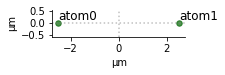

In [46]:
duration = 200
R = 5

# Atom Register and Device
L = 2
reg = Register.rectangle(1, L, spacing=R, prefix='atom')
device = Chadoq2(reg) 
reg.draw()

## State Preparation

The first part of our sequence will correspond to preparing the different states on which the CZ gate will act. For this, we define the following `Pulse` instances that correspond to $\pi$ and $2\pi$ pulses (notice that the area can be easily fixed using the predefined `BlackmanWaveform`:

In [47]:
pi = Pulse(BlackmanWaveform(duration,np.pi/(1000)),ConstantWaveform(duration,0),0)
twopi = Pulse(BlackmanWaveform(duration,2*np.pi/(1000)),ConstantWaveform(duration,0),0)

We write a function that adds the pulses that create the desired state, retargetting the channel as needed.

In [48]:
def prepare(seq,state_id):
    """Pulse sequence to prepare `state_id`"""
            
    pi_Y = Pulse(BlackmanWaveform(duration,np.pi/(1000)),ConstantWaveform(duration,0),3*np.pi/2)
    if state_id=='hh':  # 00
        seq.declare_channel('raman', 'raman_local') # For preparing state
        seq.target('atom0', 'raman')
        seq.add(pi_Y, 'raman')
        seq.target('atom1', 'raman')
        seq.add(pi_Y, 'raman','wait-for-all')
    elif state_id=='gh':  # 01
        seq.declare_channel('raman', 'raman_local') # For preparing state
        seq.target('atom1', 'raman')
        seq.add(pi_Y, 'raman')
    elif state_id=='hg':  # 10
        seq.declare_channel('raman', 'raman_local') # For preparing state
        seq.target('atom0', 'raman')
        seq.add(pi_Y, 'raman')
    elif state_id=='gg':  # 11
        return None
    else:
        raise ValueError('No state corresponds')

In [49]:
def prep_state(state):
    # Define sequence and Set channels
    seq = Sequence(device)
    # Prepare state:
    prepare(seq, state)
    seq.draw()
    return seq

## Constructing the Gate Sequence

We apply the common $\pi-2\pi-\pi$ sequence for the CZ gate 

In [50]:
def CZ_gate(in_state):
    # Define sequence and Set channels
    seq = Sequence(device)
    
    seq.declare_channel('rydberg', 'rydberg_local') #Atom 0 will be control

    # Prepare state:
    prepare(seq, in_state)
    
    # Write CZ sequence:
    seq.target('atom0','rydberg')
    seq.add(pi, 'rydberg','wait-for-all') 
    seq.target('atom1','rydberg')
    seq.add(twopi, 'rydberg')
    seq.target('atom0','rydberg')
    seq.add(pi, 'rydberg') 

    seq.draw()
    return seq
    

In [51]:
states3 = {
    'gg' : qutip.tensor([qutip.basis(3,1),qutip.basis(3,1)]),
    'hg' : qutip.tensor([qutip.basis(3,2),qutip.basis(3,1)]),
    'gh' : qutip.tensor([qutip.basis(3,1),qutip.basis(3,2)]),
    'hh' : qutip.tensor([qutip.basis(3,2),qutip.basis(3,2)])
}

states2 = {
    'gg' : qutip.tensor([qutip.basis(2,0),qutip.basis(2,0)]),
    'hg' : qutip.tensor([qutip.basis(2,1),qutip.basis(2,0)]),
    'gh' : qutip.tensor([qutip.basis(2,0),qutip.basis(2,1)]),
    'hh' : qutip.tensor([qutip.basis(2,1),qutip.basis(2,1)])
}

#full_state = 0.5 * (states['gg'] + states['hg'] + states['gh'] + states['hh'])
#target_state = 0.5 * (-states['gg'] - states['hg'] - states['gh'] + states['hh'])

# State Preparation

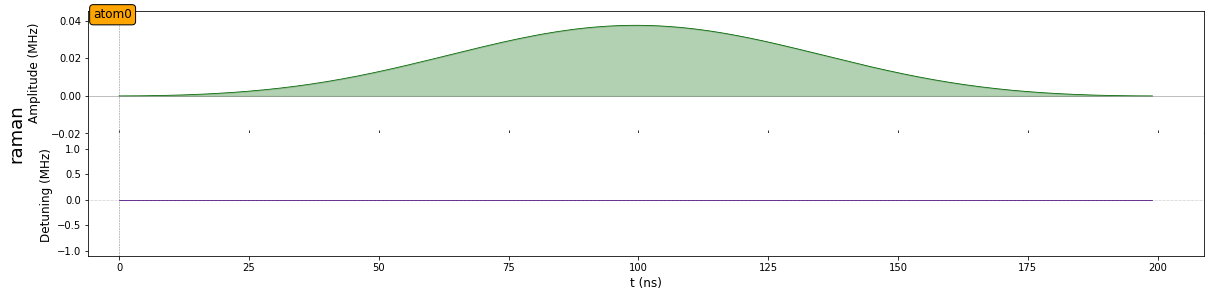

No observable provided. Calculating state evolution...
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.03s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s


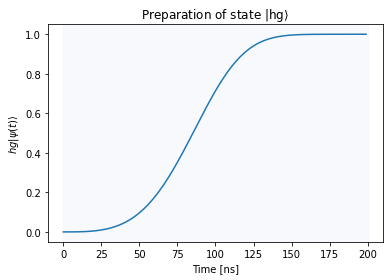

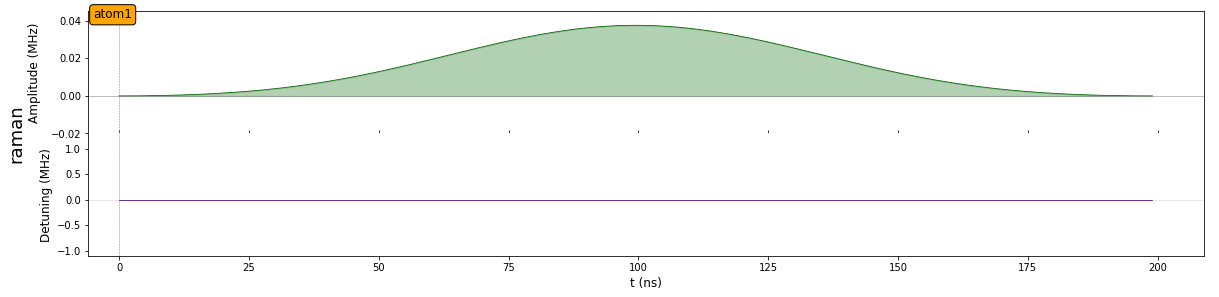

No observable provided. Calculating state evolution...
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.03s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.05s


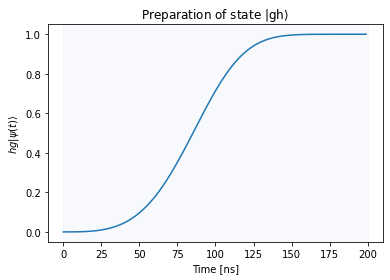

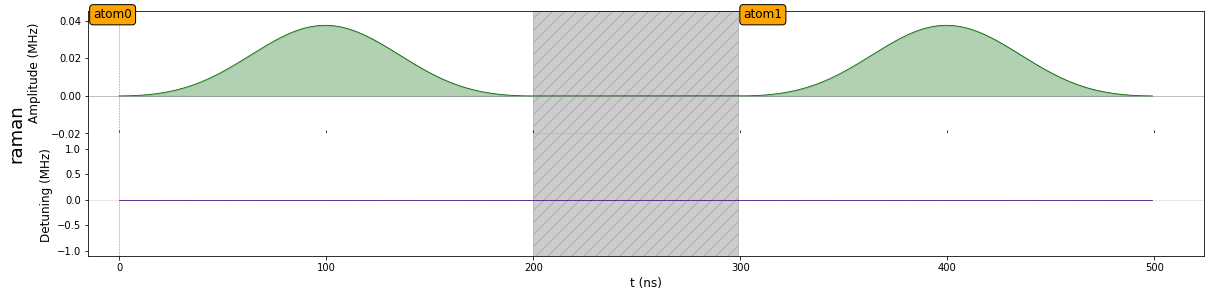

No observable provided. Calculating state evolution...
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.04s. Est. time left: 00:00:00:00
60.0%. Run time:   0.04s. Est. time left: 00:00:00:00
70.0%. Run time:   0.05s. Est. time left: 00:00:00:00
80.0%. Run time:   0.07s. Est. time left: 00:00:00:00
90.0%. Run time:   0.08s. Est. time left: 00:00:00:00
Total run time:   0.09s


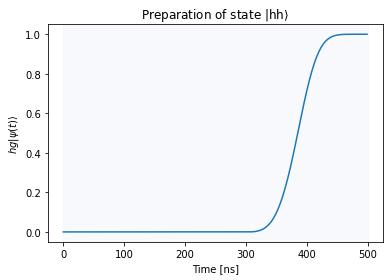

In [52]:
for state in ['hg','gh','hh']:
    seq = prep_state(state)
    simul = Simulation(seq)
    simul.run()
    result = simul.output
    
    data=[st.overlap(states2[state]) for st in result.states]
    
    #plt.plot(np.imag(data))
    plt.plot(np.real(data))
    plt.xlabel(r"Time [ns]")
    plt.ylabel(r'$ hg | \psi(t)\rangle$')
    plt.axvspan(0, state.count('h')*duration+ (state.count('h')//2)*100, alpha=0.04, color='royalblue')
    plt.title(fr"Preparation of state $|${state}$\rangle$")

# Simulation of CZ sequence

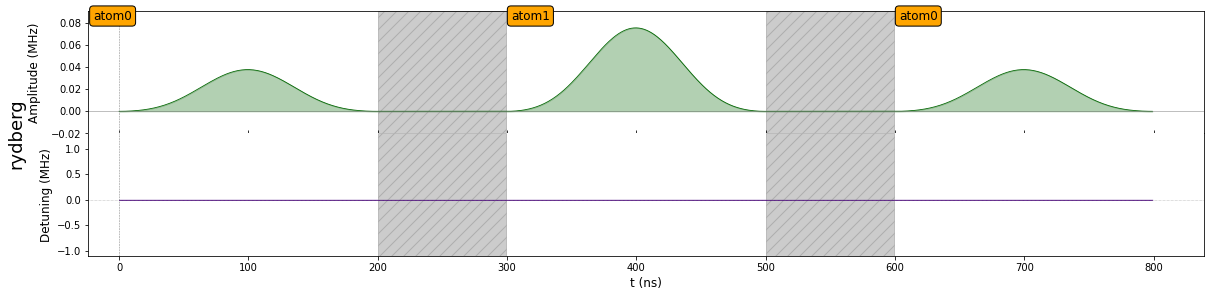

No observable provided. Calculating state evolution...
10.0%. Run time:   0.76s. Est. time left: 00:00:00:06
20.0%. Run time:   1.60s. Est. time left: 00:00:00:06
30.0%. Run time:   2.46s. Est. time left: 00:00:00:05
40.0%. Run time:   3.28s. Est. time left: 00:00:00:04
50.0%. Run time:   4.09s. Est. time left: 00:00:00:04
60.0%. Run time:   4.89s. Est. time left: 00:00:00:03
70.0%. Run time:   5.70s. Est. time left: 00:00:00:02
80.0%. Run time:   6.52s. Est. time left: 00:00:00:01
90.0%. Run time:   7.35s. Est. time left: 00:00:00:00
Total run time:   8.17s
(-0.999999969997136+0.0002129698554780278j)


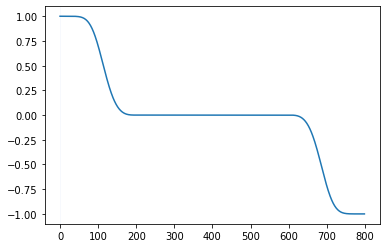

In [9]:
in_state = 'gg'
seq = CZ_gate(in_state)
simul = Simulation(seq)
simul.run()
results = simul.output

data=[]
for state in results.states:
    res = state.overlap(states2['hh'])
    data.append(res)

print(data[-1])

plt.plot(np.real(data))
plt.axvspan(0, in_state.count('h')*duration+ (in_state.count('h')//2)*100, alpha=0.04, color='royalblue')
#plt.title(fr"Initial state is $|${in_state}$ \rangle$")

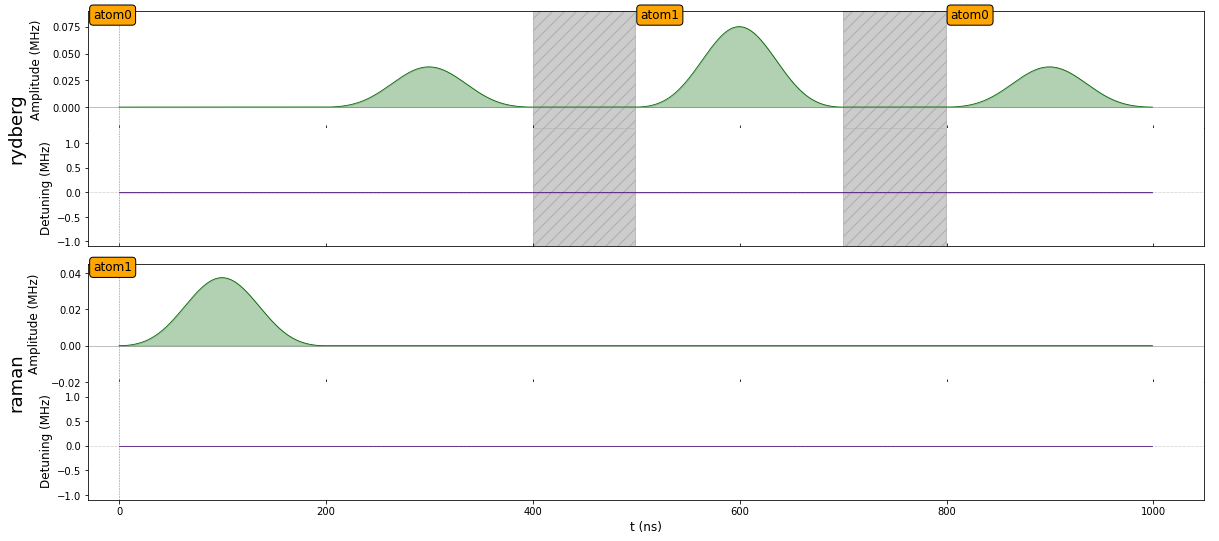

No observable provided. Calculating state evolution...
10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.97s. Est. time left: 00:00:00:03
30.0%. Run time:   2.23s. Est. time left: 00:00:00:05
40.0%. Run time:   3.45s. Est. time left: 00:00:00:05
50.0%. Run time:   4.59s. Est. time left: 00:00:00:04
60.0%. Run time:   5.71s. Est. time left: 00:00:00:03
70.0%. Run time:   6.93s. Est. time left: 00:00:00:02
80.0%. Run time:   8.37s. Est. time left: 00:00:00:02
90.0%. Run time:   9.66s. Est. time left: 00:00:00:01
Total run time:  10.91s
(-0.9999999850358964+1.836970171232173e-16j)


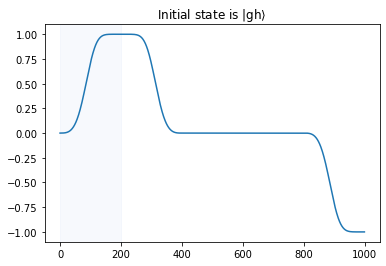

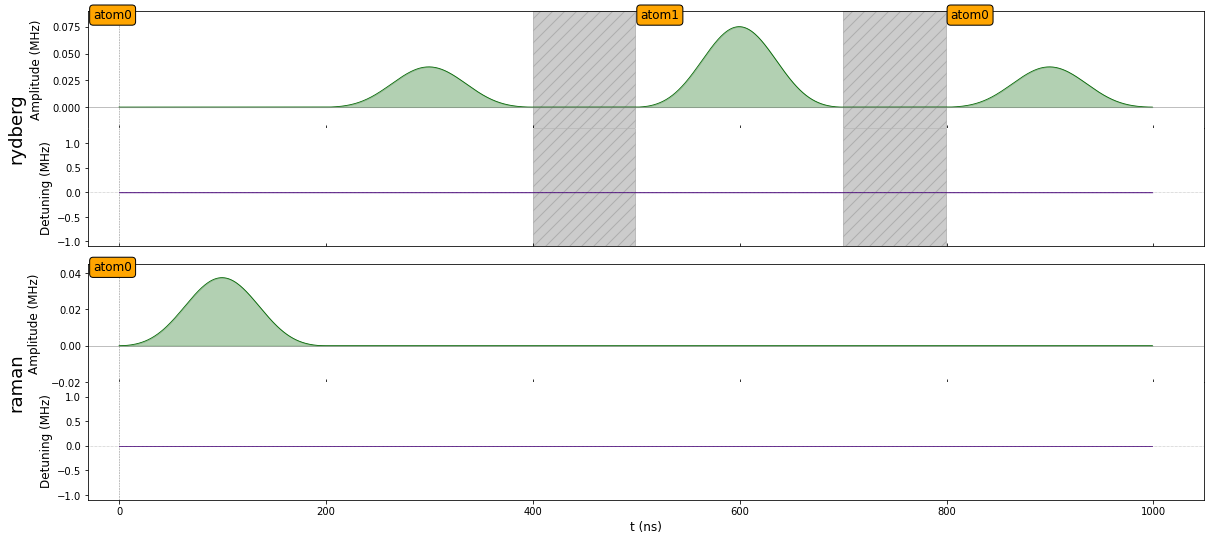

No observable provided. Calculating state evolution...
10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   1.05s. Est. time left: 00:00:00:04
30.0%. Run time:   2.30s. Est. time left: 00:00:00:05
40.0%. Run time:   3.55s. Est. time left: 00:00:00:05
50.0%. Run time:   4.93s. Est. time left: 00:00:00:04
60.0%. Run time:   6.16s. Est. time left: 00:00:00:04
70.0%. Run time:   7.42s. Est. time left: 00:00:00:03
80.0%. Run time:   8.90s. Est. time left: 00:00:00:02
90.0%. Run time:  10.23s. Est. time left: 00:00:00:01
Total run time:  11.46s
(-0.9999999850358997+1.8369701712323296e-16j)


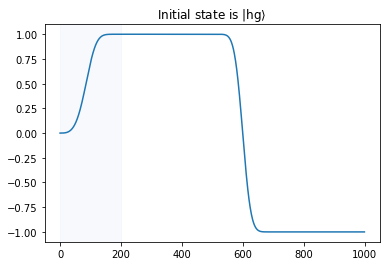

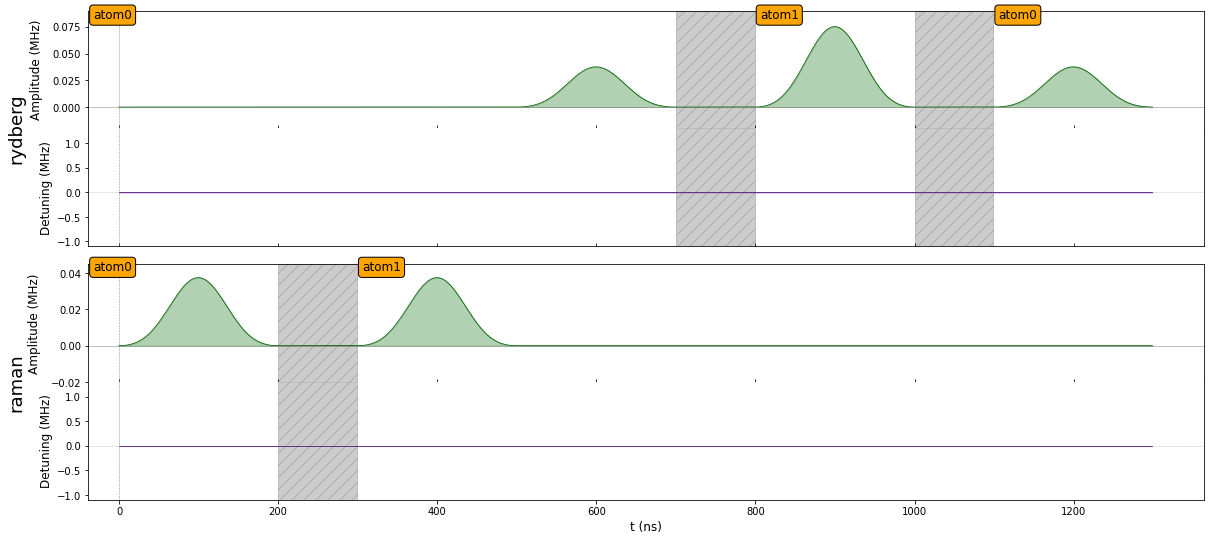

No observable provided. Calculating state evolution...
10.0%. Run time:   0.08s. Est. time left: 00:00:00:00
20.0%. Run time:   0.10s. Est. time left: 00:00:00:00
30.0%. Run time:   0.12s. Est. time left: 00:00:00:00
40.0%. Run time:   2.03s. Est. time left: 00:00:00:03
50.0%. Run time:   3.84s. Est. time left: 00:00:00:03
60.0%. Run time:   5.77s. Est. time left: 00:00:00:03
70.0%. Run time:   7.65s. Est. time left: 00:00:00:03
80.0%. Run time:   9.74s. Est. time left: 00:00:00:02
90.0%. Run time:  11.57s. Est. time left: 00:00:00:01
Total run time:  13.30s
(0.9999999832136633-3.673940335770209e-16j)


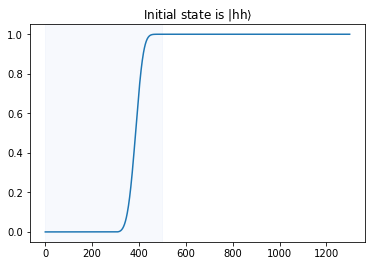

In [10]:
for in_state in ['gh','hg','hh']:
    seq = CZ_gate(in_state)
    simul = Simulation(seq)
    simul.run()
    result = simul.output

    data=[]
    for state in result.states:
        res = state.overlap(states3[in_state])
        data.append(res)

    print(data[-1])
    
    plt.plot(np.real(data))
    plt.axvspan(0, in_state.count('h')*duration+ (in_state.count('h')//2)*100, alpha=0.04, color='royalblue')
    plt.title(fr"Initial state is $|${in_state}$\rangle$")

# CCZ Gate

The same principle can be applied for composite gates. As an application, let us construct the *CCZ* gate, which determines the phase depending on the level of *two* control atoms.

In [3]:
from itertools import product

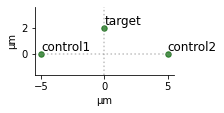

In [38]:
# Atom Register and Device
L = 3
q_dict = {"control1":np.array([-6.,0.]),
          "target": np.array([0.,2.]),
          "control2": np.array([6.,0.])}
reg = Register(q_dict)
device = Chadoq2(reg) 
reg.draw()

dev = Chadoq2(reg)

In [ ]:
def id_to_state(s_id, basis_name):

    if basis_name == 'digital':
        ket = {'g' : qutip.basis(2,0),
               'h' : qutip.basis(2,1)}
    
    elif basis_name == 'ground-rydberg':
        ket = {'r' : qutip.basis(2,0),
               'g' : qutip.basis(2,1)}
        
    elif basis_name == 'all':
        ket = {'r' : qutip.basis(3,0),
               'g' : qutip.basis(3,1),
               'h' : qutip.basis(3,2)}
        
    reg_id = s_id[1]+s_id[2]+s_id[0] 
    return qutip.tensor([ket[x] for x in reg_id])

########

def prepare_state(state_id, seq, duration=200):
    pi_Y = Pulse(BlackmanWaveform(duration,np.pi/(1000)),ConstantWaveform(duration,0),-np.pi/2)
    
    pool = {''.join(x) for x in product('gh', repeat=3)}
    if state_id not in pool:
        raise ValueError('Not a valid initial state.')
        
    if state_id != 'ggg':
        seq.declare_channel('raman','raman_local','target')
        #    seq.delay(duration, 'raman')
        if state_id[2] == 'h': # Target will be last character in `state_id` string
            seq.add(pi_Y,'raman') 
        if state_id[1] == 'h': 
            seq.target('control1','raman')
            seq.add(pi_Y,'raman') 
        if state_id[0] == 'h':
            seq.target('control2','raman')
            seq.add(pi_Y,'raman') 
        
########

def prepare_and_simulate(state_id, duration = 200):
    seq = Sequence(dev)
    
    prepare_state(state_id, seq, duration)
    prep_time = max(seq._last(ch).tf for ch in seq.declared_channels)
    print('Loaded Sequence.')
    seq.draw()
    
    print('Begin Simulation...')
    sim = Simulation(seq)
    sim.run()

    initial_st = id_to_state(state_id, basis_name=sim.basis_name)
    
    res = []
    for st in sim.output.states:
        res.append(st.overlap(initial_st))

    plt.axvspan(0, prep_time, alpha=0.04, color='royalblue')
    plt.plot(np.real(res))

########



In [39]:



def apply_CCZ(state_id, duration = 200, plot=False):
    seq = Sequence(dev)
    seq.declare_channel('ryd1','rydberg_local','control1')
    seq.declare_channel('ryd2','rydberg_local2','control2')

    pi = Pulse(BlackmanWaveform(duration,np.pi/(1000)),ConstantWaveform(duration,0),0)
    twopi = Pulse(BlackmanWaveform(duration,2*np.pi/(1000)),ConstantWaveform(duration,0),0)

    prepare_state(state_id, seq, duration)
    prep_time = max(seq._last(id).tf for id in seq.declared_channels)

    seq.add(pi,'ryd1','wait-for-all')
    seq.align('ryd1','ryd2') 
    seq.add(pi,'ryd2')

    seq.target('target','ryd2')
    seq.add(twopi,'ryd2')
    seq.target('control2','ryd2')
    #seq.align('ryd1','ryd2') 

    seq.add(pi,'ryd2')
    seq.align('ryd1','ryd2') 
    seq.add(pi,'ryd1')
    
    #print('Loaded Sequence.')
    
    #seq.draw()

    #print('Begin Simulation...')
    
    sim = Simulation(seq)
    sim.run()
    
    res = []
    initial_st = id_to_state(state_id, basis_name=sim.basis_name)
    for st in sim.output.states:
        res.append(st.overlap(initial_st))
    
    if plot:
        plt.axvspan(0, prep_time, alpha=0.04, color='royalblue')
        plt.plot(np.real(res))
    return res[-1]


In [40]:
pool = {''.join(x) for x in product('gh', repeat=3)}


    
CCZ = {state: apply_CCZ(state) for state in pool}

No observable provided. Calculating state evolution...
10.0%. Run time:   0.02s. Est. time left: 00:00:00:00
20.0%. Run time:   0.05s. Est. time left: 00:00:00:00
30.0%. Run time:   2.77s. Est. time left: 00:00:00:06
40.0%. Run time:   5.64s. Est. time left: 00:00:00:08
50.0%. Run time:   8.75s. Est. time left: 00:00:00:08
60.0%. Run time:  12.10s. Est. time left: 00:00:00:08
70.0%. Run time:  15.32s. Est. time left: 00:00:00:06
80.0%. Run time:  18.69s. Est. time left: 00:00:00:04
90.0%. Run time:  22.33s. Est. time left: 00:00:00:02
Total run time:  25.91s
No observable provided. Calculating state evolution...
10.0%. Run time:   2.16s. Est. time left: 00:00:00:19
20.0%. Run time:   4.74s. Est. time left: 00:00:00:18
30.0%. Run time:   7.26s. Est. time left: 00:00:00:16
40.0%. Run time:   9.65s. Est. time left: 00:00:00:14
50.0%. Run time:  11.86s. Est. time left: 00:00:00:11
60.0%. Run time:  14.28s. Est. time left: 00:00:00:09
70.0%. Run time:  16.54s. Est. time left: 00:00:00:07
80

Our results are as expected: only the $|hhh\rangle$ state (which corresponds to a $111$ digital state) gets its phase flipped in sign

In [41]:
CCZ

{'hgg': (-0.9999998987956349+0.0003324237774348655j),
 'ggg': (-0.9999744414841543+0.007147432578101395j),
 'hhg': (-0.999999943028322+3.6739401881316706e-16j),
 'ggh': (-0.9999767315474207+0.006815016677728733j),
 'hhh': (0.9999999464411774-5.510910301004978e-16j),
 'hgh': (-0.9999999466552226+3.6739402014567106e-16j),
 'ghg': (-0.9999998877676607+0.0003324237737647998j),
 'ghh': (-0.9999999538810209+3.6739402280033557e-16j)}